## This is  basic example of problem solved by linear regression having only one feature 

### Importing all the necessary modules

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

### Reading all the csv files using pandas

In [2]:
X = pd.read_csv('Linear_X_Train.csv').values
Y = pd.read_csv('Linear_Y_Train.csv').values

### Normalization of Data

In [3]:
u =  X.mean()
std = X.std()
X = (X-u)/std

### Plotting of training data

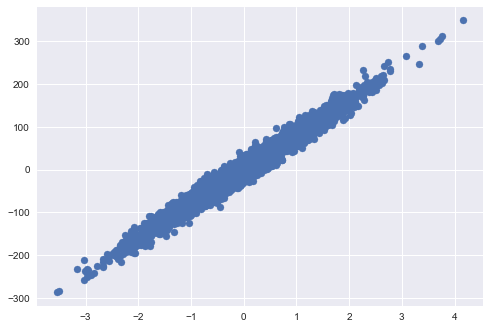

In [4]:
plt.style.use('seaborn')
plt.scatter(X,Y)
plt.show()

### Define all the functions used for linear regression 

In [5]:
def acc(X,Y,theta): ## function to find accuracy of our model
    y_ = pred(X,theta) # here we have used coeffecient of determination to find accuracy
    cal = np.sum((Y-y_)**2)/float(np.sum((Y-Y.mean())**2))
    return 1-cal
def pred(X,theta): # this funtion returns final prediction given on the given value of x and weights generated
    y_ = theta[0]+theta[1]*X
    return y_
def grad(X,Y,theta):#this function is used to find the gradient given the training X and Y values and theta 
    m = X.shape[0]
    grad = np.zeros((2,))
    for i in range(m):
        y_ = pred(X[i],theta)
        grad[0] += (y_ - Y[i])
        grad[1] += (y_ - Y[i])*X[i]
    return grad/m
def train(X,Y,lr=0.2,max_itr=100):#this function is used for generate theta given the training data
    theta =np.zeros((2,))
    for i in range(max_itr):
        g = grad(X,Y,theta)
        theta[0] = theta[0] - lr*g[0]
        theta[1] = theta[1] - lr*g[1]
    return theta



### Lets learn the parameters from the given training  Data

In [6]:
theta = train(X,Y)

## Lets see how it works on training data

In [7]:
y_ = pred(X,theta)
        
    

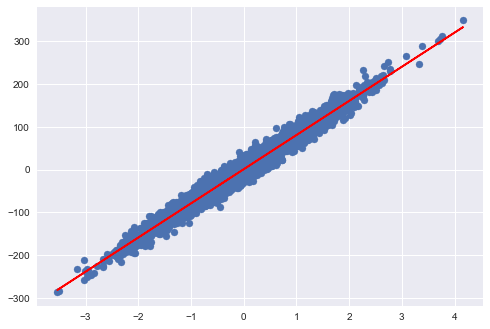

In [8]:
plt.scatter(X,Y)
plt.plot(X,y_,color = 'red')
plt.show()
        

### lets check accuracy of our prediction 

In [9]:
acc(X,Y,theta)

0.9709612233822353

### lets read our test data using pandas

In [10]:
X_test = pd.read_csv('Linear_X_Test.csv').values

### Normalize data

In [11]:
u =  X_test.mean()
std = X_test.std()
X = (X-u)/std

## Generate prediction based on paramaters learned 

In [12]:
y_pred = pred(X_test,theta)


## Save our prediction to csv file 

##### Convert it into dataframe first

In [13]:
df = pd.DataFrame(data = y_pred, columns=['y'])


In [14]:
df.to_csv('Linear_Y_Test.csv ',index = False)